# Подключаем библиотеки

In [3]:
import os
import pandas as pd             # библиотека для анализа данных
import sqlite3                  # подключение к базе данных SQLite3        
import matplotlib.pyplot as plt # построение графиков

# Текущая директория
ROOT_PATH = os.path.abspath(os.curdir)

%matplotlib inline     

# Структуры данных в Pandas
---
## Series

In [2]:
# создаём серию
simple_list = ['a', 'b', 'c', 'd']
simple_ser = pd.Series(simple_list)

simple_ser

0    a
1    b
2    c
3    d
dtype: object

In [3]:
# обращение к элементам серии
simple_list[1:3]

['b', 'c']

In [6]:
# арифметические операции с сериями
num_series_1 = pd.Series([1,4,6,7,8])
num_series_2 = pd.Series([10,20,30,40,55])

num_series_1 + num_series_2

0    11
1    24
2    36
3    47
4    63
dtype: int64

In [7]:
# выравнивание по индексам
num_series_1 = pd.Series([1,4,6,7,8], index = ['a','b','c','d','e'])
num_series_2 = pd.Series([10,20,30,40,55], index = ['e','d','c','b','a'])

num_series_1 + num_series_2

a    56
b    44
c    36
d    27
e    18
dtype: int64

## DataFrame

In [8]:
# создаём таблицу из словара
data_dict = {'name': ['Alexey', 'Andrey', 'Sergey', 'Denis', 'Anna', 'Kirill'],
             'age': [36, 31, 23, 19, 25, 42],
             'department': ['analytics', 'programmers', 'sales', 'sales', 'accountant', 'analytics']}

data = pd.DataFrame(data_dict)

data

,name,age,department
0,Alexey,36,analytics
1,Andrey,31,programmers
2,Sergey,23,sales
3,Denis,19,sales
4,Anna,25,accountant
5,Kirill,42,analytics


In [9]:
# по сути таблица это набор серий
sr1 = pd.Series(['a', 'b', 'c', 'a', 'c'])
sr2 = pd.Series([10, 13, 9, 5, 15])

df = pd.DataFrame({'mark': sr1, 
                   'val': sr2})

df

,mark,val
0,a,10
1,b,13
2,c,9
3,a,5
4,c,15


In [10]:
# отобрать несколько столбцов
data[['name', 'department']]

,name,department
0,Alexey,analytics
1,Andrey,programmers
2,Sergey,sales
3,Denis,sales
4,Anna,accountant
5,Kirill,analytics


In [11]:
# отобрать строки, сотрудники старше 30 лет
data[ data.age > 30 ]

,name,age,department
0,Alexey,36,analytics
1,Andrey,31,programmers
5,Kirill,42,analytics


In [12]:
# отбираем данные по нескольким условиям
data[ (data.age < 40) & ( data.department == 'analytics' ) ]

,name,age,department
0,Alexey,36,analytics


# Загрузка данных из внешних источников
---
## Загрузка данных из CSV файла

In [17]:
staff_dict = pd.read_csv(os.path.join(ROOT_PATH, 'staff_dict.csv'), sep=';')

staff_dict

,id,name,Age,Experience,Salary
0,1,John,34,7,2000
1,2,Stan,21,1,1200
2,3,Mark,29,3,1600
3,4,Karl,25,2,900
4,5,Mike,38,9,2850
5,6,Alex,28,4,1850
6,7,Julia,42,5,1300
7,8,Fred,39,6,1600
8,9,Linda,19,1,800


## Загрузка данных из Excel

In [15]:
## Загрузка данных из  Excel файла
# staff_dict_excel = pd.read_excel('https://github.com/selesnow/publications/blob/master/code_example/ProductStar/start_in_pandas/staff_dict.xlsx?raw=true',
#                                 index_col='id',
#                                 sheet_name='staff_dict')

staff_dict_excel = pd.read_excel(os.path.join(ROOT_PATH, 'staff_dict.xlsx'), index_col='id', sheet_name='staff_dict')

#D:/Google Диск/Отчётность/Netpeak/Выступления/ProductStar/Основы Python. Работа с библиотекой Pandas/staff_dict.xlsx
staff_dict_excel

,name,Age,Experience,Salary
id,,,,
1,John,34,7,2000
2,Stan,21,1,1200
3,Mark,29,3,1600
4,Karl,25,2,900
5,Mike,38,9,2850
6,Alex,28,4,1850
7,Julia,42,5,1300
8,Fred,39,6,1600
9,Linda,19,1,800


## Загрузка данных из базы данных

In [13]:
# подключение к БД
# con = sqlite3.connect("D:/Google Диск/Отчётность/Netpeak/Выступления/ProductStar/Основы Python. Работа с библиотекой Pandas/database.db")

con = sqlite3.connect(os.path.join(ROOT_PATH,"database.db"))

# формируем запрос 
query = """
SELECT id, name, Age, Experience, Salary 
FROM staff_table;
"""

# получить результат выполнения SQL запроса
staff_dict_sql = pd.read_sql(query, con, index_col = 'id')

staff_dict_sql

,name,Age,Experience,Salary
id,,,,
1,John,34,7,2000
2,Stan,21,1,1200
3,Mark,29,3,1600
4,Karl,25,2,900
5,Mike,38,9,2850
6,Alex,28,4,1850
7,Julia,42,5,1300
8,Fred,39,6,1600
9,Linda,19,1,800


# Проверка загруженных данных

In [18]:
# посмотреть 3 первые строки
staff_dict.head(3)

,id,name,Age,Experience,Salary
0,1,John,34,7,2000
1,2,Stan,21,1,1200
2,3,Mark,29,3,1600


In [19]:
# посмотреть 3 последние строки
staff_dict.tail(3)

,id,name,Age,Experience,Salary
6,7,Julia,42,5,1300
7,8,Fred,39,6,1600
8,9,Linda,19,1,800


In [20]:
# посмотреть структуру таблицы
staff_dict.dtypes

id             int64
name          object
Age            int64
Experience     int64
Salary         int64
dtype: object

In [21]:
# получить описательные статистики
staff_dict.describe()

,id,Age,Experience,Salary
count,9.000000,9.000000,9.000000,9.000000
mean,5.000000,30.555556,4.222222,1566.666667
std,2.738613,8.171767,2.773886,627.992834
min,1.000000,19.000000,1.000000,800.000000
25%,3.000000,25.000000,2.000000,1200.000000
50%,5.000000,29.000000,4.000000,1600.000000
75%,7.000000,38.000000,6.000000,1850.000000
max,9.000000,42.000000,9.000000,2850.000000


In [22]:
# получить описательные статистики по категориальной переменной
staff_dict.name.describe()

count         9
unique        9
top       Julia
freq          1
Name: name, dtype: object

# Основные операции по манипуляции с данными

In [32]:
# загрузка данных
# таблицы продаж
# sales_1 = pd.read_excel('D:/Google Диск/Отчётность/Netpeak/Выступления/ProductStar/Основы Python. Работа с библиотекой Pandas/sales.xlsx',
#                         sheet_name='sales_1')

# sales_2 = pd.read_excel('D:/Google Диск/Отчётность/Netpeak/Выступления/ProductStar/Основы Python. Работа с библиотекой Pandas/sales.xlsx',
#                         sheet_name='sales_2')

sales_1 = pd.read_excel(os.path.join(ROOT_PATH, 'sales.xlsx'), sheet_name='sales_1')

sales_2 = pd.read_excel(os.path.join(ROOT_PATH, 'sales.xlsx'), sheet_name='sales_2')

# справочник магазинов
# shops = pd.read_excel('D:/Google Диск/Отчётность/Netpeak/Выступления/ProductStar/Основы Python. Работа с библиотекой Pandas/sales.xlsx',
#                       sheet_name='shop')
shops = pd.read_excel(os.path.join(ROOT_PATH, 'sales.xlsx'), sheet_name='shop')

# справочник товаров
# products = pd.read_excel('D:/Google Диск/Отчётность/Netpeak/Выступления/ProductStar/Основы Python. Работа с библиотекой Pandas/sales.xlsx',
#                           sheet_name='products')
products = pd.read_excel(os.path.join(ROOT_PATH, 'sales.xlsx'), sheet_name='products')

# справочник менеджеров по продажам
# managers = pd.read_excel('D:/Google Диск/Отчётность/Netpeak/Выступления/ProductStar/Основы Python. Работа с библиотекой Pandas/sales.xlsx',
#                           sheet_name='managers')
managers = pd.read_excel(os.path.join(ROOT_PATH, 'sales.xlsx'), sheet_name='managers')

## Анализ структуры загруженных данных

In [24]:
# таблица продаж
sales_1.head(5)

,sale_id,date,shop,manager,product,count
0,1,2020-03-29,2,3,8,1
1,2,2020-05-11,3,3,2,3
2,3,2020-04-29,2,4,7,3
3,4,2020-04-14,1,4,9,4
4,5,2020-04-30,3,1,6,5


In [26]:
# посмотреть количество строк и столбцов
sales_1.shape

(300, 6)

In [27]:
len(sales_1)

300

In [28]:
# типы данных в таблице продаж
sales_1.dtypes

sale_id             int64
date       datetime64[ns]
shop                int64
manager             int64
product             int64
count               int64
dtype: object

In [29]:
# общие сведения о данных в таблице
sales_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   sale_id  300 non-null    int64         
 1   date     300 non-null    datetime64[ns]
 2   shop     300 non-null    int64         
 3   manager  300 non-null    int64         
 4   product  300 non-null    int64         
 5   count    300 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 14.2 KB


In [33]:
# справочник магазинов
shops

,shop_id,shop_name,country
0,1,west wing,usa
1,2,breeze,canada
2,3,monaco,usa


In [34]:
# справочник товаров
products.head()

,product_id,product_name,price
0,1,notebook samsung,1000
1,2,notebook dell,860
2,3,smartphone huawei,500
3,4,smartphone qiaomi,450
4,5,smartphone samsung,950


In [35]:
# справочник менеджеров по продажам
managers

,manager_id,manager_name,percent
0,1,Nick,9
1,2,John,5
2,3,Anna,10
3,4,Elena,4


## Переименование столбцов и вертикальное объединение таблиц

In [36]:
{'sales_1': sales_1.columns,
 'sales_2': sales_2.columns}

{'sales_1': Index(['sale_id', 'date', 'shop', 'manager', 'product', 'count'], dtype='object'),
 'sales_2': Index(['id', 'sale_date', 'Shop', 'manager', 'product', 'count'], dtype='object')}

In [37]:
# попытка вертикально объединить таблицы
sales = pd.concat([sales_1, sales_2])
sales

,sale_id,date,shop,manager,product,count,id,sale_date,Shop
0,1.0,2020-03-29,2.0,3,8,1,NaN,NaT,NaN
1,2.0,2020-05-11,3.0,3,2,3,NaN,NaT,NaN
2,3.0,2020-04-29,2.0,4,7,3,NaN,NaT,NaN
3,4.0,2020-04-14,1.0,4,9,4,NaN,NaT,NaN
4,5.0,2020-04-30,3.0,1,6,5,NaN,NaT,NaN
...,...,...,...,...,...,...,...,...,...
312,NaN,NaT,NaN,4,6,1,613.0,2019-08-23,1.0
313,NaN,NaT,NaN,4,8,5,614.0,2019-09-12,1.0
314,NaN,NaT,NaN,2,6,3,615.0,2019-09-04,2.0
315,NaN,NaT,NaN,2,6,4,616.0,2019-10-14,2.0


In [38]:
# переименовываем столбцы (inplace=True - изменения непосредственно в существующей таблице)
sales_2.rename(columns = {'id': 'sale_id', 'sale_date': 'date', 'Shop': 'shop'}, inplace=True)
sales_2

,sale_id,date,shop,manager,product,count
0,301,2019-10-06,1,1,2,3
1,302,2019-10-21,2,4,4,2
2,303,2019-10-16,2,2,10,3
3,304,2019-08-07,1,2,6,1
4,305,2019-08-04,2,3,2,4
...,...,...,...,...,...,...
312,613,2019-08-23,1,4,6,1
313,614,2019-09-12,1,4,8,5
314,615,2019-09-04,2,2,6,3
315,616,2019-10-14,2,2,6,4


In [39]:
## Горизонтальное соединение таблиц по ключу (объединение по нескольким полям - 
## left_on или right_on - список полей [..., ...]
sales_total = pd.merge(sales_2, shops, left_on = 'shop', right_on = 'shop_id', how='inner').\
                 merge(products, left_on = 'product', right_on = 'product_id', how='inner').\
                 merge(managers, left_on = 'manager', right_on = 'manager_id', how='inner')

sales_total

,sale_id,date,shop,manager,product,count,shop_id,shop_name,country,product_id,product_name,price,manager_id,manager_name,percent
0,301,2019-10-06,1,1,2,3,1,west wing,usa,2,notebook dell,860,1,Nick,9
1,368,2019-08-15,1,1,2,3,1,west wing,usa,2,notebook dell,860,1,Nick,9
2,444,2019-10-04,1,1,2,3,1,west wing,usa,2,notebook dell,860,1,Nick,9
3,348,2019-11-11,1,1,6,2,1,west wing,usa,6,iphone,1200,1,Nick,9
4,464,2019-08-14,1,1,6,4,1,west wing,usa,6,iphone,1200,1,Nick,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,610,2019-09-04,2,3,3,2,2,breeze,canada,3,smartphone huawei,500,3,Anna,10
313,463,2019-09-06,3,3,3,4,3,monaco,usa,3,smartphone huawei,500,3,Anna,10
314,518,2019-08-07,3,3,3,2,3,monaco,usa,3,smartphone huawei,500,3,Anna,10
315,579,2019-09-09,3,3,3,5,3,monaco,usa,3,smartphone huawei,500,3,Anna,10


## Добавление вычисляемых столбцов

In [40]:
# рассчитываем сумму транзакции
sales_total['transaction_sum'] = sales_total['price'] * sales_total['count']

# расчитываем бонус менеджера
sales_total['manager_bonus'] = sales_total['transaction_sum'] * ( sales_total['percent'] / 100 )

sales_total

,sale_id,date,shop,manager,product,count,shop_id,shop_name,country,product_id,product_name,price,manager_id,manager_name,percent,transaction_sum,manager_bonus
0,301,2019-10-06,1,1,2,3,1,west wing,usa,2,notebook dell,860,1,Nick,9,2580,232.2
1,368,2019-08-15,1,1,2,3,1,west wing,usa,2,notebook dell,860,1,Nick,9,2580,232.2
2,444,2019-10-04,1,1,2,3,1,west wing,usa,2,notebook dell,860,1,Nick,9,2580,232.2
3,348,2019-11-11,1,1,6,2,1,west wing,usa,6,iphone,1200,1,Nick,9,2400,216.0
4,464,2019-08-14,1,1,6,4,1,west wing,usa,6,iphone,1200,1,Nick,9,4800,432.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312,610,2019-09-04,2,3,3,2,2,breeze,canada,3,smartphone huawei,500,3,Anna,10,1000,100.0
313,463,2019-09-06,3,3,3,4,3,monaco,usa,3,smartphone huawei,500,3,Anna,10,2000,200.0
314,518,2019-08-07,3,3,3,2,3,monaco,usa,3,smartphone huawei,500,3,Anna,10,1000,100.0
315,579,2019-09-09,3,3,3,5,3,monaco,usa,3,smartphone huawei,500,3,Anna,10,2500,250.0


## Группировка и агрегация данных

In [41]:
# рассчитываем сводные данные по менеджерам
# groupby('manager_name') группировка по полю 'manager_name'
# Агригирование:
# agg({'manager_bonus': 'sum', - функция сумма по полю 'manager_bonus'
# 'transaction_sum': ['sum', 'mean'], - функции сумма и среднее по полю 'transaction_sum'
# 'sale_id': pd.Series.nunique}) - количество уникальных значений по'sale_id'
# reset_index().\ - сброс составных индексов (желательно всегда)
# sort_values(by=('manager_bonus',  'sum') - сортировка
# ascending=False - сортировка в порядке убывания

mangers_stat = sales_total.groupby('manager_name').\
                           agg({'manager_bonus': 'sum',
                                'transaction_sum': ['sum', 'mean'],
                                'sale_id': pd.Series.nunique}).\
                           reset_index().\
                           sort_values(by=('manager_bonus',  'sum'), ascending=False)

# переименовываем столбцы
mangers_stat.columns = ['name', 'bonus', 'sale_sum', 'avg_transaction', 'transaction']

# округление
mangers_stat = mangers_stat.round({'avg_transaction': 2})

mangers_stat

,name,bonus,sale_sum,avg_transaction,transaction
3,Nick,20547.9,228310,3261.57,70
0,Anna,20293.0,202930,2779.86,73
2,John,13646.0,272920,3101.36,88
1,Elena,11452.8,286320,3329.30,86


## Визуализация результатов

<AxesSubplot:ylabel='name'>

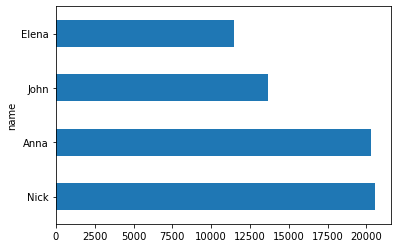

In [48]:
# переносим имя менеджера в индекс
mangers_stat.index = mangers_stat.name

# строим визуализацию результатов
mangers_stat.bonus.plot(kind='barh')

<AxesSubplot:xlabel='name'>

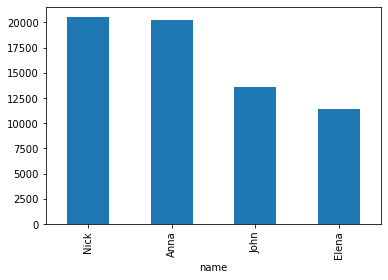

In [49]:
# переносим имя менеджера в индекс
mangers_stat.index = mangers_stat.name

# альтернативный вариант, вызвать метод bar()
mangers_stat.bonus.plot.bar()

<AxesSubplot:xlabel='date'>

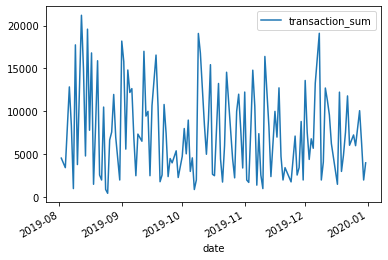

In [50]:
# линейный график продаж 
sales_total.groupby('date').agg({'transaction_sum': sum}).plot()

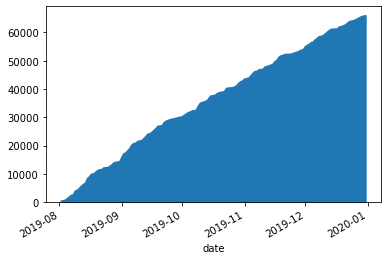

In [51]:
# расчёт и визуализация нарастающего итога
# groupby('date').\ - группировка
# agg({'manager_bonus': sum}).\ - функция сумма по полю 'manager_bonus'
# manager_bonus.cumsum().\ - расчёт нарастающего итога
# plot(kind='area') - тип графика

cumsum_sales = sales_total.groupby('date').\
                           agg({'manager_bonus': sum}).\
                           manager_bonus.cumsum().\
                           plot(kind='area')


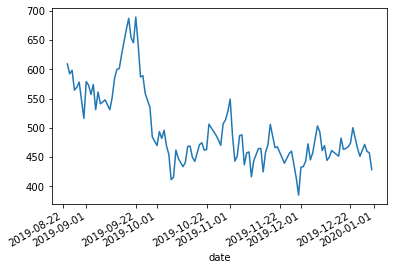

In [57]:
# скользящее среднее
# groupby('date').\ - группировка
# agg({'manager_bonus': sum}).\ - функция сумма по полю 'manager_bonus'
# manager_bonus.\ - полученное выше поле
# rolling(window=20).\ - размер окна
# mean().\ - среднее
# plot() - 

cumsum_sales = sales_total.groupby('date').\
                           agg({'manager_bonus': sum}).\
                           manager_bonus.\
                           rolling(window=20).\
                           mean().\
                           plot()


### сравниваем данные с прошлым днём

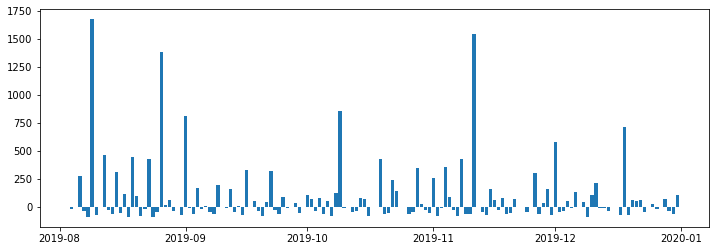

In [58]:
import datetime # библиотека для работы с временными рядами

# суммируем данные по дням - первая таблица
daily_sales = sales_total.groupby('date').agg({'transaction_sum': sum})

# делаем копию полученного результата, сдвигая продажи на 1 день - вторая таблица
yesterday_sales = daily_sales.copy().shift(1)

# рассчитываем разницу между текущим (первая таблица), и предыдущим (вторая таблица) днём в процентах
daily_sales['step_rate'] = round((daily_sales.transaction_sum - yesterday_sales.transaction_sum) / yesterday_sales.transaction_sum * 100, 2)

# строим график с помощью matplotlib
plt.bar(x=daily_sales.index, height=daily_sales['step_rate'])
# увеличиваем размер графика
plt.gcf().set_size_inches(12, 4)

<AxesSubplot:title={'center':'manager_bonus'}, xlabel='[manager_name]'>

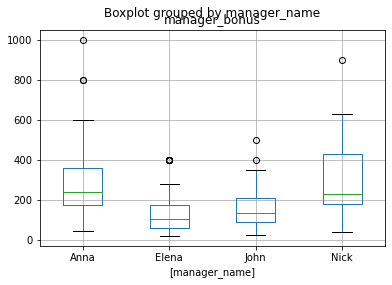

In [59]:
# сравниваем продажи по странам
sales_total.boxplot(column=['manager_bonus'], by=['manager_name'])

# Сводные таблицы в pandas

In [60]:
pd.pivot_table(sales_total, # таблица
               index = 'manager_name', # строка
               columns = 'shop_name', # колонка
               values = 'sale_id', # расчетная величина
               aggfunc = pd.Series.nunique) # функция к расётной величине

shop_name,breeze,monaco,west wing
manager_name,,,
Anna,28,28,17
Elena,24,32,30
John,28,22,38
Nick,20,29,21


In [61]:
pd.pivot_table(sales_total, 
               index = 'product_name', 
               columns = 'country', 
               values = 'transaction_sum', 
               aggfunc = sum,
               margins = True) # итоги по столбцам

country,canada,usa,All
product_name,,,
iphone,36000,81600,117600
macbook air,26600,112000,138600
macbook pro,52000,154000,206000
notebook dell,34400,48160,82560
notebook samsung,24000,66000,90000
smartphone huawei,12500,36500,49000
smartphone qiaomi,21600,23850,45450
smartphone samsung,38950,50350,89300
tv samsung,41000,66000,107000
